In [97]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [98]:
df = pd.read_csv('/content/Insurance_Data.txt')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [99]:
X = df[['age']]
y = df.bought_insurance

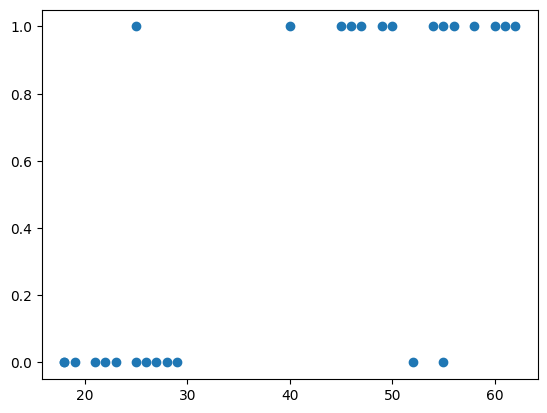

In [100]:
plt.scatter(X,y)

Here from above Graph, Relationship shows that we need to apply a LogisticRegression, cause of Classfication Problem.

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 10)

In [103]:
X_train

,age
21,26
11,28
1,25
2,47
12,27
24,50
14,49
13,29
20,21
3,52


In [104]:
X_test

,age
7,60
5,56
18,19


In [105]:
y_train

21    0
11    0
1     0
2     1
12    0
24    1
14    1
13    0
20    0
3     0
25    1
6     0
19    0
10    0
23    1
26    0
8     1
22    1
16    1
17    1
0     0
15    1
4     1
9     1
Name: bought_insurance, dtype: int64

In [106]:
y_test

7     1
5     1
18    0
Name: bought_insurance, dtype: int64

In [107]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [108]:
model.fit(X_train,y_train)

LogisticRegression()

In [109]:
X_test

,age
7,60
5,56
18,19


In [110]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0])

In [111]:
model.predict_proba(X_test)

array([[0.06470723, 0.93529277],
       [0.10327405, 0.89672595],
       [0.92775095, 0.07224905]])

In [112]:
model.score(X_test, y_test)

1.0

In [113]:
m = model.coef_
m

array([[0.12740563]])

In [114]:
b = model.intercept_
b

array([-4.97335111])

We apply Math on Logistic Function to get our Predictation.

In [115]:
import math
def pred_fun(age):
  y = m*age +b
  z = 1 / (1 + math.exp(-y))
  return z

In [116]:
pred_fun(35)

0.37422022636604474

In [117]:
pred_fun(43)

0.6236549867909517

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
Plot bar charts showing impact of employee salaries on retention
Plot bar charts showing corelation between department and employee retention
Now build logistic regression model using variables that were narrowed down in step 1
Measure the accuracy of the model

In [118]:
df = pd.read_csv('/content/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [119]:
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Department                10
salary                     3
dtype: int64

In [120]:
df.groupby('left').mean()

<ipython-input-120-b0959f325c8f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [121]:
df.isna().value_counts(ascending = False)

satisfaction_level  last_evaluation  number_project  average_montly_hours  time_spend_company  Work_accident  left   promotion_last_5years  Department  salary
False               False            False           False                 False               False          False  False                  False       False     14999
dtype: int64

In [122]:
import seaborn as sns


In [123]:
 left = df[df.left == 1]

 left.shape

(3571, 10)

In [124]:
 retained = df[df.left == 0]

 retained.shape

(11428, 10)

<Axes: xlabel='salary', ylabel='count'>

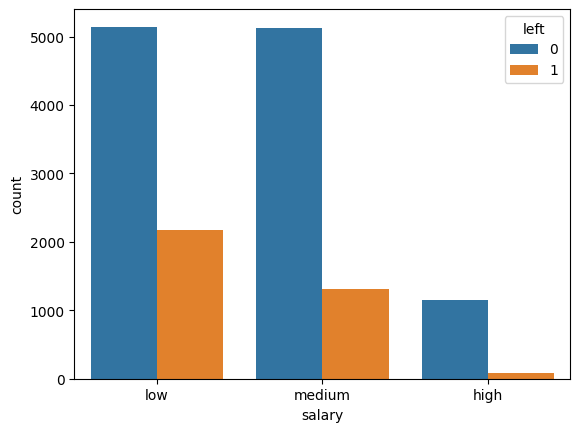

In [125]:
sns.countplot(data = df, x = df.salary, hue= 'left')

In [126]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [127]:
dummy_salary = pd.get_dummies(df.salary, prefix = 'salary')
dummy_salary

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [129]:
df = pd.concat([df,dummy_salary], axis = 1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0


<Axes: xlabel='Department', ylabel='count'>

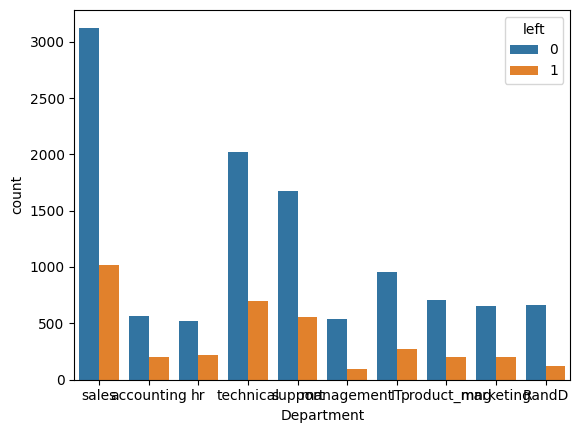

In [135]:
sns.countplot(data = df, x = 'Department', hue = 'left')

<Axes: xlabel='satisfaction_level', ylabel='left'>

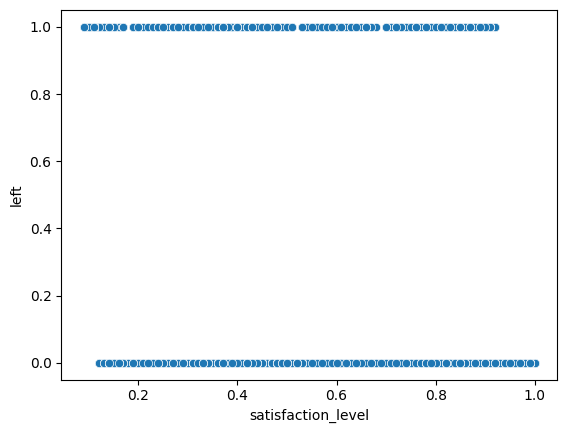

In [138]:
sns.scatterplot(data = df, x = 'satisfaction_level', y = 'left')

In [146]:
df[df.columns].corr()

<ipython-input-146-ef732ef84f6f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df.columns].corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.029708,-0.047415,0.031367
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.020628,0.005221,0.006191
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.008726,-0.002504,0.007377
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.007101,-0.001050,0.005007
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.039953,-0.040110,0.018299
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009040,-0.006813,0.001856
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.120929,0.134722,-0.068833
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.076756,-0.082832,0.040985
salary_high,0.029708,-0.020628,-0.008726,-0.007101,0.039953,0.009040,-0.120929,0.076756,1.000000,-0.292560,-0.260274
salary_low,-0.047415,0.005221,-0.002504,-0.001050,-0.040110,-0.006813,0.134722,-0.082832,-0.292560,1.000000,-0.847144


<ipython-input-148-6ebea90bf76f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[df.columns[1:]].corr(), annot = True)


<Axes: >

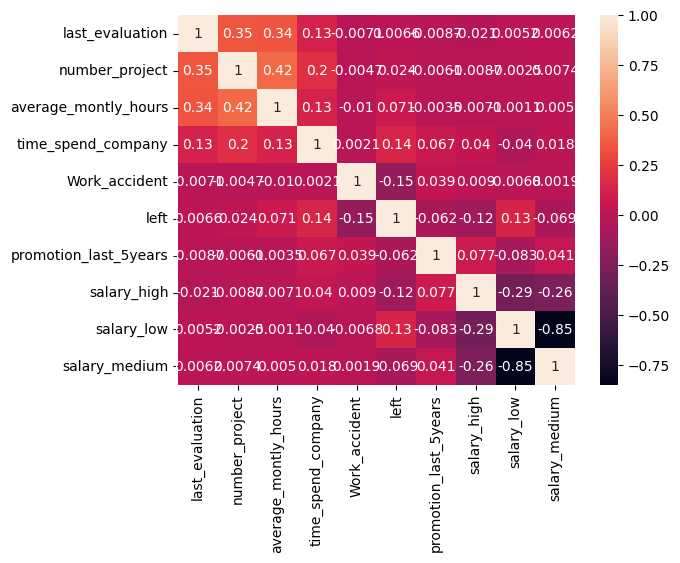

In [148]:
sns.heatmap(df[df.columns[1:]].corr(), annot = True)

In [150]:
df[df.columns].corr()['left']

<ipython-input-150-6b86026660eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df.columns].corr()['left']


satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident           -0.154622
left                     1.000000
promotion_last_5years   -0.061788
salary_high             -0.120929
salary_low               0.134722
salary_medium           -0.068833
Name: left, dtype: float64

In [ ]:
**Satisfaction Level**
**Average Monthly Hours**
**Promotion Last 5 Years**
**Salary*

1. **Satisfaction Level**
2. **Average Monthly Hours**
3. **Promotion Last 5 Years**
4. **Salary**

from Above EDa  it can be derived that these all Features should be selected for Model Building.


In [151]:
df_for_model = df[['satisfaction_level' , 'average_montly_hours', 'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium']]
df_for_model.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [157]:
y = df['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [161]:
X = df_for_model
X

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [162]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [163]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((11999, 6), (3000, 6), (11999,), (3000,))

In [164]:
from sklearn.linear_model import LogisticRegression


In [165]:
model = LogisticRegression()
model

LogisticRegression()

In [166]:
model.fit(X_train, y_train)

LogisticRegression()

In [167]:
X_test

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
13982,0.65,125,0,0,1,0
822,0.41,128,0,0,1,0
13751,0.44,125,0,0,0,1
9656,0.93,190,0,0,0,1
13497,0.76,170,0,0,0,1
...,...,...,...,...,...,...
3876,0.54,183,0,0,1,0
11504,0.70,150,0,0,1,0
2435,0.21,130,0,0,1,0
5161,0.85,142,0,0,0,1


In [171]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [172]:
y_test

13982    0
822      1
13751    0
9656     0
13497    0
        ..
3876     0
11504    0
2435     0
5161     0
5184     0
Name: left, Length: 3000, dtype: int64

In [169]:
model.score(X_test, y_test)

0.7706666666666667

In [175]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse

0.22933333333333333